In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [ ]:
df.isna().sum()

Product Name        0
Brand Name      65171
Price            5933
Rating              0
Reviews            62
Review Votes    12296
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
...,...,...,...,...,...,...
413835,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,another great deal great price,0.0
413836,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,Ok,0.0
413837,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,Passes every drop test onto porcelain tile!,0.0
413838,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,I returned it because it did not meet my needs...,0.0


In [ ]:
Avg_Rating=df.groupby(by='Brand Name').mean()[0:5]

In [ ]:
Avg_Rating["Rating"]

Brand Name
AMM Global Enterprises    4.888889
ARGOM TECH                3.000000
ASUS                      4.470085
ASUS Computers            4.028249
AT&T                      5.000000
Name: Rating, dtype: float64

Text(0.5, 1.0, 'Avg Rating Graph')

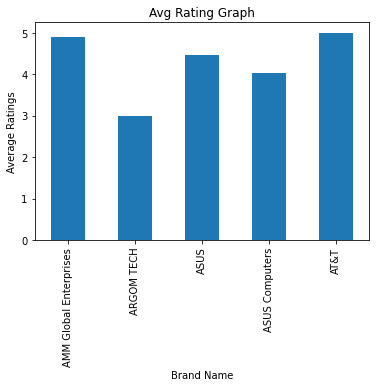

In [ ]:
Avg_Rating["Rating"].plot(kind='bar')
plt.xlabel("Brand Name")
plt.ylabel("Average Ratings")
plt.title("Avg Rating Graph")

Text(0, 0.5, 'Count')

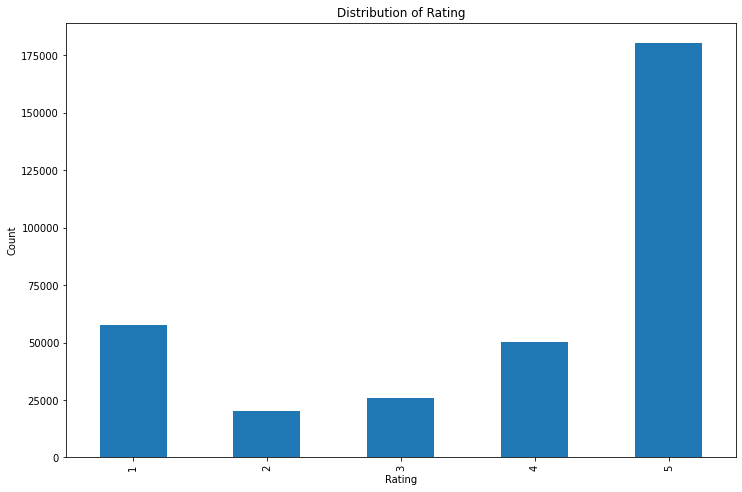

In [ ]:
# Ploting distribution of rating
plt.figure(figsize=(12,8))
# sns.countplot(df['Rating'])
df['Rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Count')

Text(0.5, 1.0, 'Number of Reviews for Top 20 Brands')

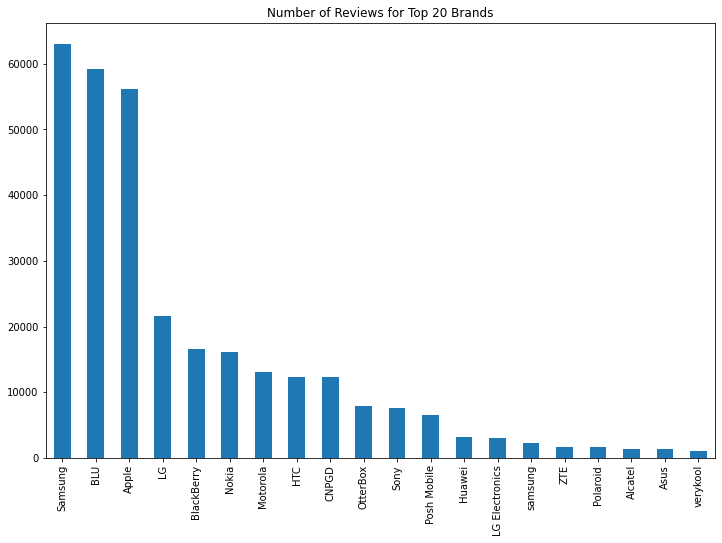

In [ ]:
brands = df["Brand Name"].value_counts()
# brands.count()
plt.figure(figsize=(12,8))
brands[:20].plot(kind='bar')
plt.title("Number of Reviews for Top 20 Brands")

Text(0, 0.5, 'Count')

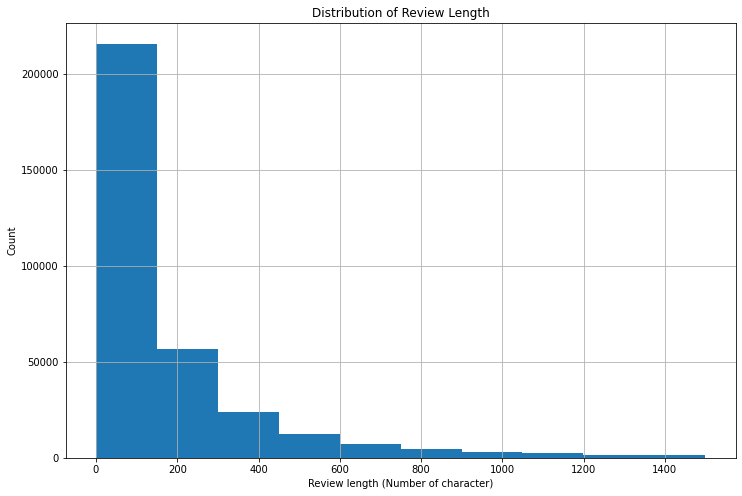

In [ ]:
review_length = df["Reviews"].dropna().map(lambda x: len(x))
plt.figure(figsize=(12,8))
review_length.loc[review_length < 1500].hist()
plt.title("Distribution of Review Length")
plt.xlabel('Review length (Number of character)')
plt.ylabel('Count')

In [ ]:
import numpy as np
df = df.sample(frac=0.1, random_state=0) 
#drop missing values
df.dropna(inplace=True)
# Remove any 'neutral' ratings equal to 3
df = df[df['Rating'] != 3]
# Encode 4s and 5s as 1 (positive sentiment) and 1s and 2s as 0 (negative sentiment)
df['Sentiment'] = np.where(df['Rating'] > 3, 1, 0)

In [ ]:
df

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Sentiment
408129,Verizon Motorola RAZR V3m GPS 3G Camera Cell P...,Motorola,13.33,4,Replacement for my husband's old one just like...,0.0,1
193207,HTC One M7 32GB Unlocked GSM 4G LTE Android Ce...,HTC,133.95,5,Excellent! Love it,0.0,1
214625,LG G Vista 4G Unlocked 4G LTE Android 8MP Came...,LG,99.99,4,So far it has been a good phone.,0.0,1
125325,BLU Life 8 XL Smartphone - Unlocked - Global G...,BLU,2000.00,4,"Not a shill. Swear.Anywho, bought this for my ...",1.0,1
269532,Nokia Lumia 635 8GB Unlocked GSM 4G LTE Window...,Nokia,99.95,1,It clearly stated the phone was unlocked. It i...,0.0,0
...,...,...,...,...,...,...,...
299313,POSH MOBILE TITAN PRO HD ANDROID GSM UNLOCKED ...,Posh Mobile,97.99,2,It eats up battery its also eats away data I b...,0.0,0
279660,Otium Gear S Bluetooth Smart Watch WristWatch ...,Otium,51.99,1,Wrong color received stainless and black. Had ...,0.0,0
164314,"BLU WIN JR - 4.0"" Windows Smartphone - Global ...",BLU,59.99,4,Item was bought as a gift to a friend who live...,0.0,1
26835,Apple iPhone 5C 16GB White - Unlocked Cell Phones,Apple,135.00,1,Not even 4 months into owning this phone has i...,0.0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Reviews'], df['Sentiment'], \
                                                    test_size=0.1,)
print('Load %d training examples and %d validation examples. \n' %(X_train.shape[0],X_test.shape[0]))
print('Show a review in the training set : \n', X_train.iloc[10])
X_test.iloc[10]

Load 27735 training examples and 3082 validation examples. 

Show a review in the training set : 
 The phone is offered J200H.


"I'am very satisfied with purchasing my new phone. Everything described was exactly true about the conditions of the phone which looks practically new. I would reccomend anyone to get their phone with them :)"

In [ ]:
from nltk.corpus import stopwords 
from bs4 import BeautifulSoup
from nltk.stem import SnowballStemmer
import re 
def cleanText(raw_text, remove_stopwords=False, stemming=False, split_text=False):
  text = BeautifulSoup(raw_text, 'lxml').get_text()  #remove html
  letters_only = re.sub("[^a-zA-Z]", " ", text)  # remove non-character
  words = letters_only.lower().split()
  if remove_stopwords: # remove stopword
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
  if stemming==True:
    stemmer = SnowballStemmer('english')
    words = [stemmer.stem(w) for w in words]
  if split_text==True:
    return (words)
  return( " ".join(words))

In [ ]:
X_train_cleaned = []
X_test_cleaned = []
for d in X_train:
    X_train_cleaned.append(cleanText(d))
for d in X_test:
    X_test_cleaned.append(cleanText(d))

/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:336: UserWarning: "http://www.amazon.com/gp/product/B00OSTKZWM?redirect=true&ref_=cm_cr_ryp_prd_ttl_sol_1" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:336: UserWarning: "http://www.amazon.com/gp/product/B00PEJQU9M?redirect=true&ref_=cm_cr_ryp_prd_ttl_sol_0" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:336: UserWarning: "https://www.amazon.com/dp/B00K15KRV6/ref=cm_cr_ryp_prd_ttl_sol_22" looks like a URL. Beautiful Soup is not an HTTP cli

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
tfidf = TfidfVectorizer(min_df=5)
X_train_tfidf = tfidf.fit_transform(X_train)
print("Number of features : %d \n" %len(tfidf.get_feature_names()))
print("some feature names : \n", tfidf.get_feature_names()[::1000])
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train)

Number of features : 5999 

some feature names : 
 ['00', 'charged', 'face', 'lets', 'pressing', 'stand']


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
feature_names = np.array(tfidf.get_feature_names())
sorted_coef_index = lr.coef_[0].argsort()
print('\nTop 10 features with smallest coefficients :\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Top 10 features with largest coefficients : \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))


Top 10 features with smallest coefficients :
['not' 'disappointed' 'poor' 'worst' 'horrible' 'never' 'return' 'waste'
 'terrible' 'doesn']

Top 10 features with largest coefficients : 
['great' 'love' 'excellent' 'perfect' 'best' 'awesome' 'good' 'easy'
 'amazing' 'excelente']


In [ ]:
predictions = lr.predict(tfidf.transform(X_test_cleaned))
from sklearn.metrics import accuracy_score
from sklearn import metrics
print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test, predictions)))
print("\nClassification report : \n", metrics.classification_report(y_test, predictions))
print("\nConfusion Matrix : \n", metrics.confusion_matrix(y_test, predictions))


Accuracy on validation set: 0.9306

Classification report : 
               precision    recall  f1-score   support

           0       0.90      0.82      0.86       793
           1       0.94      0.97      0.95      2289

    accuracy                           0.93      3082
   macro avg       0.92      0.89      0.91      3082
weighted avg       0.93      0.93      0.93      3082


Confusion Matrix : 
 [[ 649  144]
 [  70 2219]]


In [ ]:
from wordcloud import WordCloud
import nltk
nltk.download('punkt')
nltk.download('stopwords')
def create_word_cloud(brand, sentiment):
  df_brand = df.loc[df['Brand Name'].isin([brand])]
  df_brand_sample = df_brand.sample(frac=0.1)
  word_cloud_collection = ''
  if sentiment == 1:
    df_reviews = df_brand_sample[df_brand_sample["Sentiment"]==1]["Reviews"]
  if sentiment == 0:
    df_reviews = df_brand_sample[df_brand_sample["Sentiment"]==0]["Reviews"]
  for val in df_reviews.str.lower():
    tokens = nltk.word_tokenize(val)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    for words in tokens:
      word_cloud_collection = word_cloud_collection + words + ' '
  wordcloud = WordCloud(max_font_size=50, width=500, height=300).generate(word_cloud_collection)
  plt.figure(figsize=(20,20))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.show()
  #wordcloud.to_file("C:/Users/Aakash/AppData/Local/Programs/Python/Python37/data analysis/static/images/Sony.png")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


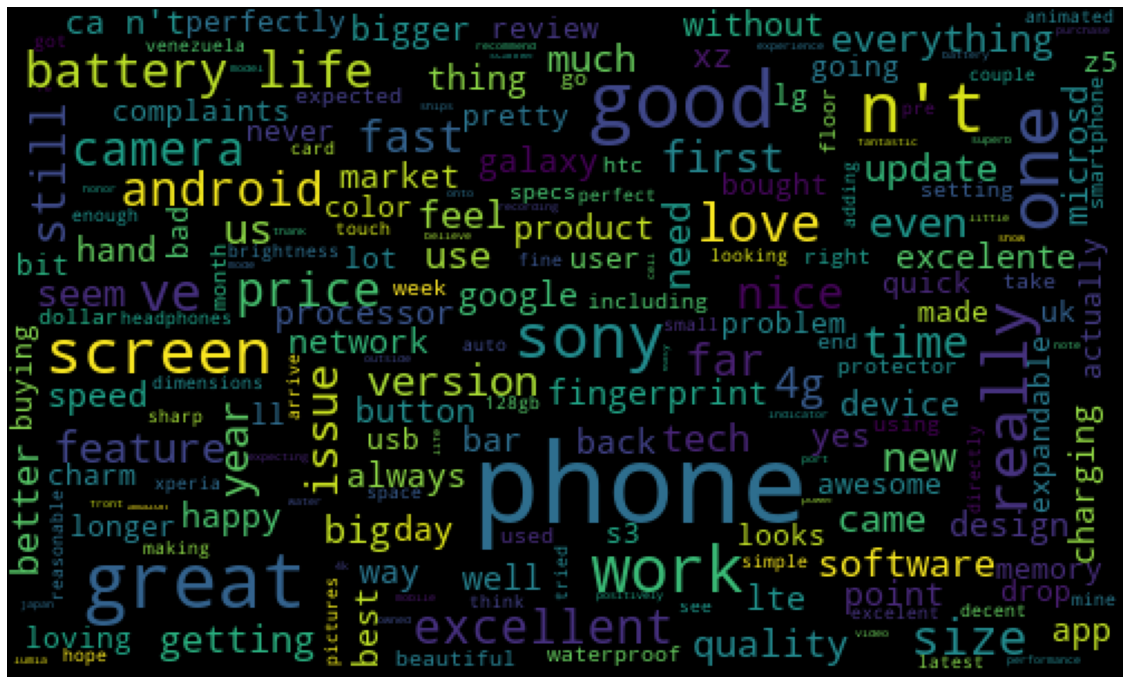

In [ ]:
create_word_cloud(brand='Sony',sentiment=1)